# Simple Correlation Function Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import scipy.special

In [2]:
plt.style.use('./correlation.mplstyle')

In [3]:
def matern(x, n_range, m, n_dim):
    
    alpha = 2*m
    epsilon = m - n_dim / 2
    
    left = (2.**(1-epsilon)) / scipy.special.gamma(epsilon)
    
    #delta_hat = 8*epsilon / (n_range**2)
    #delta_hat = 2*epsilon / (n_range**2)
    #arg = np.sqrt(delta_hat) * x 
    arg = np.sqrt(8*epsilon) * x / n_range
    
    middle = arg ** epsilon
    #middle = np.where(arg==0, 1, arg**epsilon)
    right = scipy.special.kv(epsilon, arg)
    right = np.where(x == 0, 1, right)
    result = left * middle * right
    result = np.where(arg == 0, 1, result)
    return result

In [4]:
def matern_applications(epsilon, d):
    M = (epsilon + d/2)/2
    assert M == int(M)
    return  M

In [5]:
def gaussian(x, n_range):
    return np.exp(-2*x**2/n_range**2)
    #return np.exp(-x**2/n_range**2/2)

In [6]:
def beta(j, m):
    numer = 2**j * np.math.factorial(m-1) * np.math.factorial(2*m - j - 2)
    denom = np.math.factorial(j) * np.math.factorial(m-j-1) * np.math.factorial(2*m-2)
    return numer / denom

In [7]:
def ar(x, n_range, m):
    L = .5 * (2*m - 3) ** (-.5) * n_range
    summ = np.sum([beta(j,m)*((x/L)**j) for j in range(1,m)], axis=0)
    return (1 + summ) * np.exp(-x / L)

In [8]:
rho_hat = 4
x = np.linspace(0,10,101)
xb= np.linspace(-10,10,201)

In [9]:
g = gaussian(x, rho_hat)

In [10]:
delta = np.array([np.abs(xx)<1e-12 for xx in xb])

## The process

In [186]:
kw = {"yticks": [0,1], "xticks": [-10,0,10]}

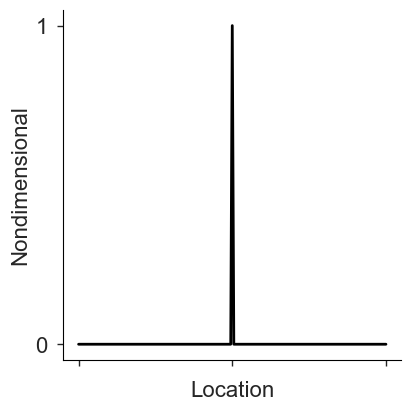

In [204]:
fig, ax = plt.subplots(figsize=(4,4),
                        constrained_layout=True
                       )

ax.plot(xb, delta, color='k')
ax.set(ylabel="Nondimensional", **kw)
ax.set(xticklabels=[],xlabel="Location")
fig.savefig("../figures/point-source.pdf", bbox_inches="tight")

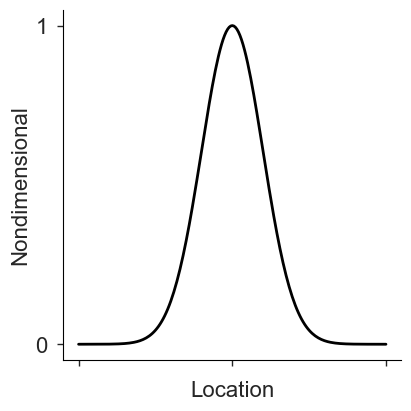

In [205]:
fig, ax = plt.subplots(figsize=(4,4),
                        constrained_layout=True
                       )

ax.plot(xb, gaussian(xb, rho_hat), color='k')
ax.set(ylabel="Nondimensional", **kw)
ax.set(xticklabels=[],xlabel="Location")
fig.savefig("../figures/gaussian-example.pdf", bbox_inches="tight")

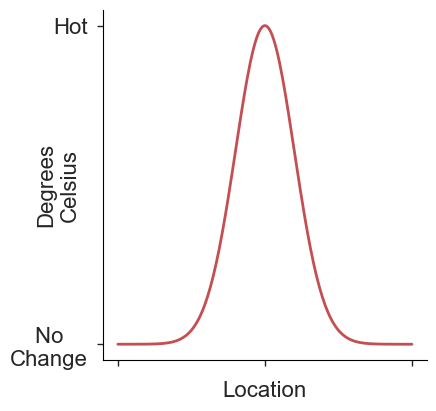

In [206]:
fig, ax = plt.subplots(figsize=(4.25,4),
                        constrained_layout=True
                       )

ax.plot(xb, gaussian(xb, rho_hat), color="C3")
ax.set(**kw)
ax.set(yticklabels=["No    %sChange"%"\n", "Hot"])
ax.set_ylabel("Degrees\nCelsius", labelpad=-50, rotation=90)
ax.set(xticklabels=[],xlabel="Location")
fig.savefig("../figures/control-update.pdf", bbox_inches="tight")

## Various diffusion 

In [207]:
def annotate(ax, xy1, xy2, **kw):
    ax.annotate(
        "",
        xy=xy1,
        xycoords="data",
        xytext=xy2,
        arrowprops=dict(
            arrowstyle="<->",
            facecolor='black',
            lw=2,
        ),
        ha='center',
    )

In [208]:
def center_axis(ax):
    
    ax.set(ylabel="", yticklabels=[], yticks=[])
    ax.spines["left"].set_visible(False)
    ax.axvline(x=0, color='k', lw=1)
    #ax.axvline(x=0, ymin=-0.01, ymax=0.01)
    #ax.text(-2, 1, "1", ha='center', transform=ax.transData)

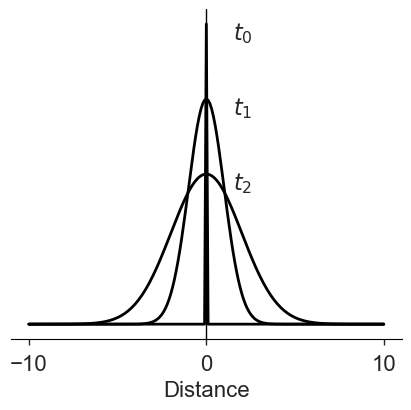

In [210]:
fig, ax = plt.subplots(figsize=(4,4),
                        constrained_layout=True
                       )

ax.plot(xb, delta, color='k')
ax.plot(xb, gaussian(xb, rho_hat/2)*3/4, color='k')
ax.plot(xb, gaussian(xb, rho_hat)/2, color='k')
ax.set(ylabel="", **kw)
center_axis(ax)
ax.text(1.5, .95, r"$t_0$")
ax.text(1.5, .7, r"$t_1$")
ax.text(1.5, .45, r"$t_2$")

ax.set_xlabel("Distance")
fig.savefig("../figures/diffusion.pdf", bbox_inches="tight")

In [211]:
kwc = kw.copy()
kwc["yticks"] = []

In [212]:
kwc

{'yticks': [], 'xticks': [-10, 0, 10]}

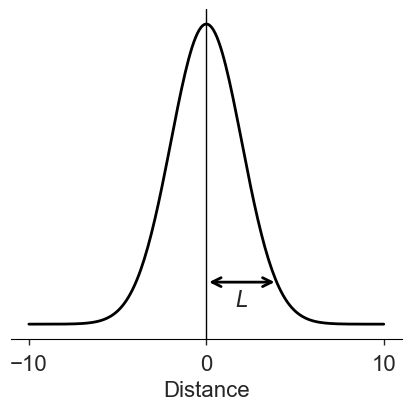

In [213]:
fig, ax = plt.subplots(figsize=(4,4),
                        constrained_layout=True
                       )

ax.plot(xb, gaussian(xb, rho_hat), color='k')
annotate(ax, (0, 0.14), (rho_hat, 0.14))
ax.text(.5*rho_hat, 0.06, r"$L$", ha='center')
center_axis(ax)
ax.set(xticks=[-10,0,10])

ax.set_xlabel("Distance")
fig.savefig("../figures/explicit-diffusion.pdf", bbox_inches="tight")

### Implicit Diffusion

[[],

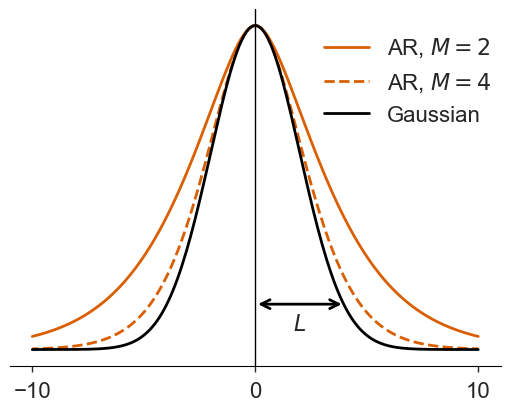

In [177]:
fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)

linestyles=['-','--']
for m, ls in zip([2,4],linestyles):
    y = ar(x, rho_hat, m)
    label = r"AR, $M = %d$" % m
    ax.plot(x, y, ls=ls, label=label, color='C1')
    ax.plot(-x, y, ls=ls, label=None, color='C1')
    
ax.plot(xb, gaussian(xb, rho_hat), color='k', label="Gaussian")

ax.legend(loc="center left", bbox_to_anchor=(.6, .8))
annotate(ax, (0, 0.14), (rho_hat, 0.14))
ax.text(.5*rho_hat, 0.06, r"$L$", ha='center')
center_axis(ax)

ax.set(**kwc)

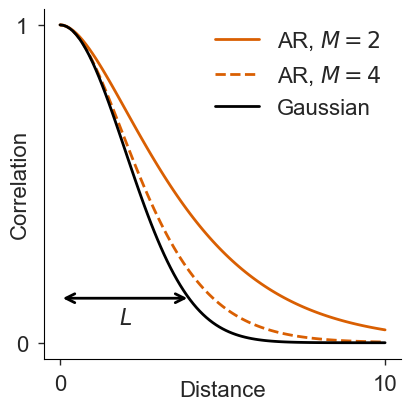

In [214]:
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)

linestyles=['-','--']
for m, ls in zip([2,4],linestyles):
    y = ar(x, rho_hat, m)
    label = r"AR, $M = %d$" % m
    p = ax.plot(x, y, ls=ls, label=label, alpha=1, color='C1')
    
ax.plot(x, g, color='k', label="Gaussian")
ax.legend()
annotate(ax, (0, 0.14), (rho_hat, 0.14))
ax.text(.5*rho_hat, 0.06, r"$L$", ha='center')

ax.set(**kwr)
ax.set_xlabel("Distance", labelpad=-10)
ax.set_ylabel("Correlation", labelpad=-10)
fig.savefig("../figures/implicit-diffusion.pdf", bbox_inches="tight")

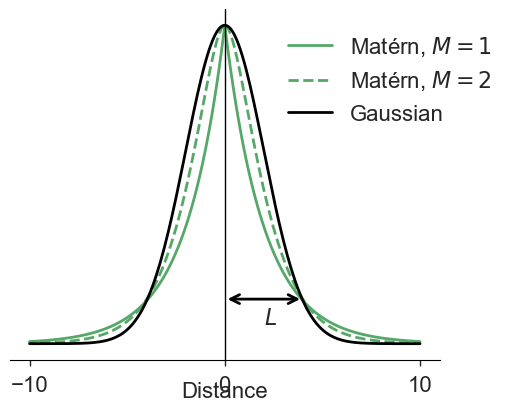

In [182]:
fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)

linestyles = ['-','--',':']
for m, ls in zip([1,2], linestyles):
    
    y = matern(x, n_range=rho_hat, m=m, n_dim=1)
    label = r"Matérn, $M = %d$" % m
    ax.plot(x, y, ls=ls, label=label, color="C0")
    ax.plot(-x,y, ls=ls, label=None, color="C0")
    
ax.plot(xb, gaussian(xb, rho_hat), color='k', label='Gaussian')

ax.set(**kwc)
ax.set_xlabel("Distance", labelpad=-10)
ax.set_ylabel("Correlation", labelpad=-10)

ax.text(rho_hat/2, 0.06, r"$L$")
annotate(ax, (0, 0.14), (rho_hat, 0.14))
center_axis(ax)

ax.legend(loc="center left", bbox_to_anchor=(.6, .8))
#axs[0].legend(bbox_to_anchor=(1.05,1.))
#fig.savefig(f"../figures/correlation_comparison.pdf", bbox_inches='tight')

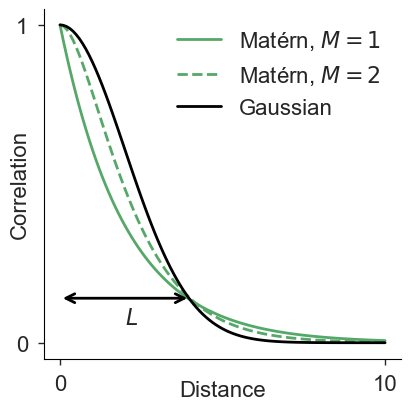

In [215]:
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)


linestyles = ['-','--',':']
for m, ls in zip([1,2], linestyles):
    
    y = matern(x, n_range=rho_hat, m=m, n_dim=1)
    label = r"Matérn, $M = %d$" % m
    ax.plot(x, y, ls=ls, label=label, color="C0")
    
ax.plot(x, g, color='k', label='Gaussian')

ax.set(**kwr)
ax.set_xlabel("Distance", labelpad=-10)
ax.set_ylabel("Correlation", labelpad=-10)

ax.text(rho_hat/2, 0.06, r"$L$")
annotate(ax, (0, 0.14), (rho_hat, 0.14))

ax.legend()
fig.savefig("../figures/matern.pdf", bbox_inches="tight")